### Change Log for Support-Vector-Machines 

> ⚠️ **WARNING:** This notebook takes over 30 minutes to train the model (<9K images). 

This notebook includes code from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) written by Jake VanderPlas. 

The original notebook explains Support Vector Machines (SVMs) using visuals, especially when dealing with well-separated classes.

In my notebook, I take a similar approach, but I apply SVMs to recognize butterflies using a labeled dataset of butterflies. 
- This demonstrates how SVMs can be versatile in different applications, making them effective for various classification tasks.

### [1. Understanding the Algorithm](#algorithm-understanding)
- **Objective:**
  - To gain understanding of the Support Vector Machine (SVM) model and understand how it is trained to fit data.

- **Changes:**
  - In the original notebook, the focus was introducing the concept of Support Vector Machines (SVMs) for both classification and regression. SVMs were explained as powerful algorithms for finding the optimal decision boundary or hyperplane to separate classes. The examples provided demonstrated SVMs in scenarios with well-separated classes, emphasizing the importance of maximizing the margin between classes.
  
  - In my notebook, I apply SVMs to the task of recognizing butterfly species using a labeled dataset of butterflies. This demonstrates the versatility of SVMs showing the effectiveness in different classification methods. 
  - My SVM implementation includes both linear and kernelized (RBF kernel) models to handle non-linear relationships in the data.

### Butterfly Species Image Classification

#### [2. Data Understanding](#data-understanding)
- **Dataset Description:**
  - Utilized a dataset consisting of 75 different classes of butterflies:
  - Over 9000 labeled images
  - Data set includes including validation images.

CSV Files:
 - Testing_set.csv: 2786 unique jpgs
 - Training_set.csv: 6499 unique labeled images
 
Directories:
- test: Contains images from Testing_set.csv
- train: Contains labeled images from Training_set.csv

- **Changes:**
  - The model is now using a dataset of `75 butterfly types` instead of `labled faces`


#### [3. Data Preparation](#data-preparation)
**Data Cleaning:**
- The dataset does not contain any null values, because of the type of data, we will not be checking for duplicates. 
  
- **Changes:**
  - Due to the large number of detailed images:
  - Images resized to 100x100 for efficiency and standardization.
  - Flattened into 1D arrays to simplify input format & increase training speed.

#### [4. Modeling](#modeling)
In VanderPlas notebook he preforms the SVM modeling using rbf kernal. 
In My notebook I preform the SVM modeling using the linear and the rbf kernal 
**Implementation Details:**
1. **RBF Kernel SVM:**
    - Applied for its flexibility in capturing non-linear relationships between data points.
    - Utilized PCA for dimensionality reduction.
    - Hyperparameter tuning using GridSearchCV.
    - Model saved to 'rbf_SVM_model.pkl' for future use.
  
2. **Linear Kernel SVM:**
    - Implemented a linear SVM model for comparison.
    - Trained on the same dataset as the RBF model.
    - Model saved to 'linear_SVM_model.pkl' for future use.

- **Challenges Encountered:**
- The significant time required for model training led to optimization strategies.
- Images were flattened into 1D arrays to reduce computational complexity and accelerate the training process.
- Parallel processing techniques, using the joblib library, were employed to expedite the image flattening operation, improving overall model training efficiency.


#### [5. Evaluation](#evaluation)
- **Challenges Encountered:**
  - Evaluated the models' performance by printing out a subset of the predictions. 
    - Due to the unlabelled nature of the test dataset, traditional accuracy scores were not applicable, my current model would have to be verified by eye.
    - In my next version I will replace the test dataset with a labled test dataset so we can compute accuracy scores and visualise results with a confusion matrix. 

#### [6. Deployment](#deployment)
- **Challenges Encountered:**
  - An attempt to deploy this model was made using a picked version of the model, but I was experiencing an issue where the pickled model was stuck returning a consistent array insted of the correct predictions.
  - Due to the acutal modeling taking a significant amoutn of time in this notebook, deploying it withouth using a saved model is not feseable. 



In [1]:
# Imports
import os
import pickle
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from skimage import io, transform 
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

#### 1. Understanding the Algorithm <a id='algorithm-understanding'></a>

### Example: Butterfly Species Classification

To demonstrate support vector machines in action, I will do similar classification technique using butterflys instead of faces

#### 2. Data Understanding <a id='data-understanding'></a>

The data set is taken from Kagggle and features 75 different classes of Butterflies. The dataset contains 9000+ labelled images including the validation images.

CSV Files:
 - Testing_set.csv: 2786 unique jpgs
 - Training_set.csv: 6499 unique labeled images
 
Directories:
- test: Contains images from Testing_set.csv
- train: Contains labeled images from Training_set.csv

In [2]:
# Load the training and testing datasets
trainingData = pd.read_csv('archive-2/Training_set.csv')
testingData = pd.read_csv('archive-2/Testing_set.csv')

# Path to the folder containing the training images
train_folder_path = 'archive-2/train'
test_folder_path = 'archive-2/test'

# Initialize lists to store image paths and labels
train_image_paths = []
test_image_paths = []
labels = []

# Loop through the training dataset and collect image paths and labels
for i in range(len(trainingData)):
    filename = trainingData['filename'].iloc[i]
    label = trainingData['label'].iloc[i]
    train_image_paths.append(os.path.join(train_folder_path, filename))
    labels.append(label)

Let's print a few butterflies to see what we're working with:

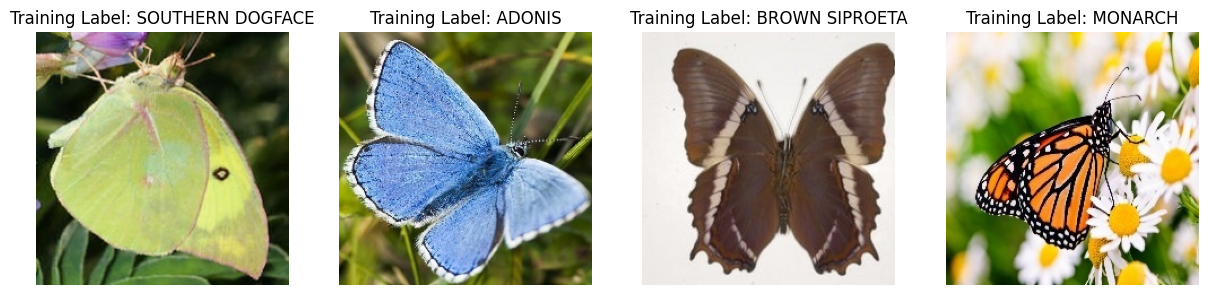

In [3]:
import matplotlib.pyplot as plt

# Display the first 4 butterflies
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

for i, (train_image_path, label) in enumerate(zip(train_image_paths[:4], labels[:4])):
    image = io.imread(train_image_path)
    axs[i].imshow(image)
    axs[i].set_title(f'Training Label: {label}')
    axs[i].axis('off')

plt.show()

#### 3. Data Preparation <a id='data-preparation'></a>

As can be seen from the output the resized images are smaller & reduced to 100x100 pixels. The images have lost some definition and clarity but still are recognisable. 

These images had to be flattened and resized into a 1D array due to the amount of images increasing computational complexity for the model. 

In [4]:
# Resize images & flatten into array 
#images = [transform.resize(io.imread(path), (100, 100)).flatten() for path in train_image_paths]
# Warning: 1m runtime 

In [5]:
#Attempt to paralise to sepped up flattening 
from joblib import Parallel, delayed

def process_image(path):
    return transform.resize(io.imread(path), (100, 100)).flatten()

images = Parallel(n_jobs=-1)(delayed(process_image)(path) for path in train_image_paths)
# Takes 20.8sec

KeyboardInterrupt: 

In [ ]:
# Resize test images & flatten
#test_images = [transform.resize(io.imread(path), (100, 100)).flatten() for path in test_image_paths]

In [ ]:
# Load all images from the testing dataset
for i in range(len(testingData)):
    filename = testingData['filename'].iloc[i]
    test_image_paths.append(os.path.join(test_folder_path, filename))


#Attempt to paralise to sepped up flattening 
def process_image(path):
    return transform.resize(io.imread(path), (100, 100)).flatten()

test_images = Parallel(n_jobs=-1)(delayed(process_image)(path) for path in test_image_paths)


#### 4. Modeling <a id='modeling'></a>

In this notebook I execute two types of model:
1. RBF Model:
2. Linear Modeling: 

##### RBF SVM Model (same method as VanderPlas)

In [ ]:
X_train = np.array(images)
y_train = labels

# Create the PCA, SVC, and pipeline
pca = PCA(n_components=50, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
# Define the hyperparameter grid
param_grid = {'svc__C': [1, 5, 10],
            'svc__gamma': [0.0001, 0.001, 0.01]}  # Reduced search space for faster execution
grid = GridSearchCV(model, param_grid)

In [ ]:
# Fit the model using training data with labels
%time grid.fit(X_train, y_train)
print(grid.best_params_)
#12 min

CPU times: user 27min 23s, sys: 5min 31s, total: 32min 54s
Wall time: 11min 57s
{'svc__C': 10, 'svc__gamma': 0.01}


In [ ]:
X_test_array = np.array(test_images)

model = grid.best_estimator_
yfit = model.predict(X_test_array)

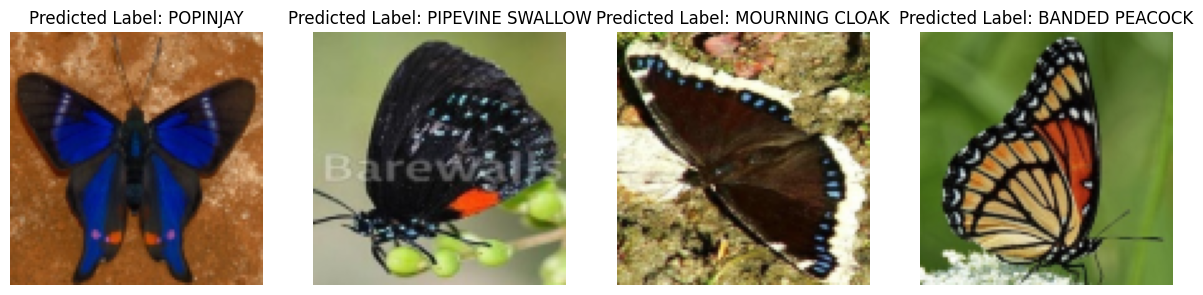

In [ ]:
# Select a random sample of images from the test set
random_indices = random.sample(range(len(X_test_array)), 4)

# Display test images and their predicted labels
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

for i, index in enumerate(random_indices):
    test_image = X_test_array[index].reshape((100, 100, 3))  # Assuming the original shape is (100, 100, 3)
    predicted_label = yfit[index]
    
    axs[i].imshow(test_image)
    axs[i].set_title(f'Predicted Label: {predicted_label}')
    axs[i].axis('off')

plt.show()

In [ ]:
# save the iris classification model as a pickle file
model_pkl_file = "rbf_SVM_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)

##### Linear SVM Model

Using the same `X_train` & `y_train` values as the previous model

In [ ]:
#Initialize and train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
#careful this takes 7,36.4min to run

SVC(kernel='linear')

Save the model for future use

In [ ]:
# save the iris classification model as a pickle file
model_pkl_file = "linear_SVM_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)

In [ ]:
# Make predictions on the validation set
y_pred_test = svm_model.predict(test_images)
# Warning: this takes 4 min 50s  to run

#### 5. Evaluation <a id='evaluation'></a>

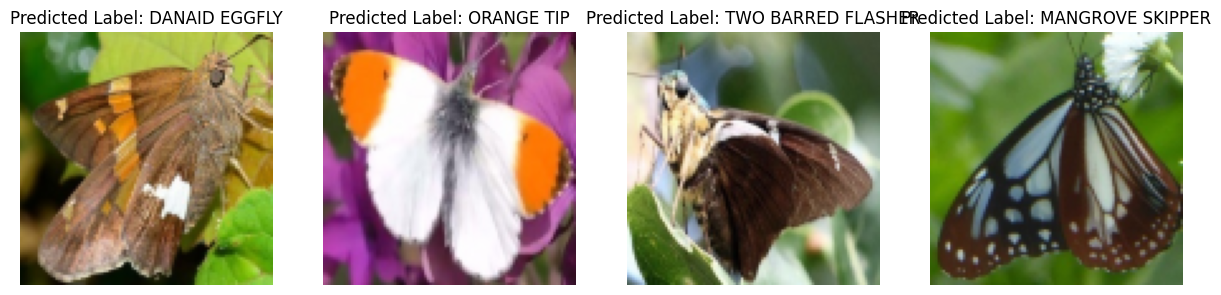

In [ ]:
# Select a random sample of images from the test set
random_indices = random.sample(range(len(X_test_array)), 4)

# Display test images and their predicted labels
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

for i, index in enumerate(random_indices):
    test_image = X_test_array[index].reshape((100, 100, 3)) 
    predicted_label = y_pred_test[index]
    
    axs[i].imshow(test_image)
    axs[i].set_title(f'Predicted Label: {predicted_label}')
    axs[i].axis('off')


Testing with image uploaded from path (Image is a SOUTHERN DOGFACE)

In [ ]:
# Load the trained SVM model
# Assuming you already have the trained model stored in the variable 'model'

# Preprocess the test image
test_image_path1 = 'archive-2/train/Image_1.jpg'  # Provide the path to your test image
test_image = transform.resize(io.imread(test_image_path1), (100, 100, 3)).flatten()

# Reshape the test image to match the format used during training
test_image = test_image.reshape(1, -1)

# Use the trained SVM model to predict the category
predicted_category = model.predict(test_image)[0]

# Display or use the predicted category as needed
print(f'Predicted Category: {predicted_category}')


Predicted Category: SOUTHERN DOGFACE


#### 6. Deployment <a id='deployment'></a>

In [ ]:
'''from skimage import io, transform
import anvil.server
import pickle
from PIL import Image
import numpy as np

model_pkl_file = "/Users/liamdurkan/Repositories/DataScience/SEM2/2 - Support Vector Machines/rbf_SVM_model.pkl"

with open(model_pkl_file, 'rb') as file:
    model = pickle.load(file)

@anvil.server.callable
def predict_linear_svm(file):
    with anvil.media.TempFile(file) as filename:
        img = Image.open(filename)

    img = img.resize((100, 100), resample=Image.BICUBIC)
    arr = np.array(img)

    # Flatten the array if necessary
    arr = arr.flatten()

    # Reshape the array to match the format used during training
    arr = arr.reshape(1, -1)

    predicted_label = model.predict(arr)[0]
    decision_values = model.decision_function(arr)
    print("Decision Values:", decision_values)
    predicted_class_index = np.argmax(decision_values)
    predicted_label = model.classes_[predicted_class_index]
    print(predicted_label)



    return predicted_label, decision_values
'''